# This script processes the o2and3 results of the minRadius study WITHOUT Memoization

1. Compile o2and3 using stage1tbb (without memoization first approach):
```
make bin/o2and3
```
2. Run the benchmarking script
```
cd scripts
python3 run_o2and3_minradius
```
3. The output that we will process is o2and3_minrad_norem_coffee.txt (renamed from o2and3.out)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import sys
from statistics import mean

def tokenize(filename):
    experiment ={}

    with open(filename) as f:
        for line in f:
            tokens = line.split()
            if "Running:" in tokens:
                name=tokens[2].split("/")[3]
                nth=int(tokens[6])
                minRad = float(tokens[8])
                if name not in experiment:
                    experiment[name]={}
                if minRad not in experiment[name]:
                    experiment[name][minRad]={}
            if 'Quadtree' in tokens:
                experiment[name][minRad][nth]=[float(tokens[5])]
            if "STAGE" in tokens:
                experiment[name][minRad][nth].append(float(tokens[5]))
            if 'Average:' in tokens:
                experiment[name][minRad][nth].append(float(tokens[1]))

    #print(experiment)

    results = {}

    for i in experiment:
        results[i]={} #LiDAR cloud name
        for j in experiment[i]:
            results[i][j]={} #minRad
            for k in experiment[i][j]:
                results[i][j][k]={} #nth
                results[i][j][k]['qtree']=experiment[i][j][k][0]
                results[i][j][k]['stage1']=mean(experiment[i][j][k][1:16:3])
                results[i][j][k]['stage2']=mean(experiment[i][j][k][2:16:3])
                results[i][j][k]['stage3']=mean(experiment[i][j][k][3:16:3])
                results[i][j][k]['owm']=experiment[i][j][k][16]
    return results

res1=tokenize("o2and3_minrad_norem_coffee.txt")

#print(results)



In [2]:
for i in res1:
    times=[res1[i][j][1]['owm'] for j in res1[i]]
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with baseline minRadius {:.1f} has sequential OWM time = {:.2f}".format(i,list(res1[i].keys())[0],res1[i][0.1][1]['owm'] ))
    print("Cloud {} with best minRadius {:.1f} has sequential OWM best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res1[i].keys())[minRad],mintime ,res1[i][0.1][1]['owm']/mintime))


Cloud AlcoyH with baseline minRadius 0.1 has sequential OWM time = 8.74
Cloud AlcoyH with best minRadius 0.8 has sequential OWM best time (speedup) = 1.63 (5.36x)
Cloud ArzuaH with baseline minRadius 0.1 has sequential OWM time = 6.60
Cloud ArzuaH with best minRadius 0.3 has sequential OWM best time (speedup) = 2.14 (3.09x)
Cloud BrionFH with baseline minRadius 0.1 has sequential OWM time = 4.48
Cloud BrionFH with best minRadius 0.2 has sequential OWM best time (speedup) = 3.77 (1.19x)
Cloud BrionUH with baseline minRadius 0.1 has sequential OWM time = 4.98
Cloud BrionUH with best minRadius 0.2 has sequential OWM best time (speedup) = 4.48 (1.11x)


In [3]:
for i in res1:
    times=[res1[i][j][8]['owm'] for j in res1[i]]
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with baseline minRadius {:.1f} has 8-core OWM time = {:.2f}".format(i,list(res1[i].keys())[0],res1[i][0.1][8]['owm'] ))
    print("Cloud {} with best minRadius {:.1f} has 8-core OWM best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res1[i].keys())[minRad],mintime ,res1[i][0.1][8]['owm']/mintime))


Cloud AlcoyH with baseline minRadius 0.1 has 8-core OWM time = 1.68
Cloud AlcoyH with best minRadius 0.7 has 8-core OWM best time (speedup) = 0.32 (5.31x)
Cloud ArzuaH with baseline minRadius 0.1 has 8-core OWM time = 1.26
Cloud ArzuaH with best minRadius 0.4 has 8-core OWM best time (speedup) = 0.42 (3.02x)
Cloud BrionFH with baseline minRadius 0.1 has 8-core OWM time = 2.54
Cloud BrionFH with best minRadius 0.2 has 8-core OWM best time (speedup) = 2.51 (1.01x)
Cloud BrionUH with baseline minRadius 0.1 has 8-core OWM time = 2.92
Cloud BrionUH with best minRadius 0.1 has 8-core OWM best time (speedup) = 2.92 (1.00x)


In [4]:
for i in res1:
    times=[res1[i][j][1]['qtree'] for j in res1[i]]
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with minRadius {:.1f} has qtree creation best time = {:.2f}".format(i,list(res1[i].keys())[minRad],mintime ))


Cloud AlcoyH with minRadius 1.9 has qtree creation best time = 0.71
Cloud ArzuaH with minRadius 1.2 has qtree creation best time = 1.37
Cloud BrionFH with minRadius 1.9 has qtree creation best time = 1.27
Cloud BrionUH with minRadius 1.6 has qtree creation best time = 1.45


In [5]:
for i in res1:
    times=[res1[i][j][1]['qtree']+res1[i][j][8]['owm'] for j in res1[i]] #8-core OWM + qtree times
    mintime=min(times)
    minRad=np.argmin(times)
    baselinetotaltime=res1[i][0.1][1]['qtree']+res1[i][0.1][8]['owm']
    print("Cloud {} with baseline minRadius {:.1f} has total (8-core owm + qtree creation) time = {:.2f}".format(i,list(res1[i].keys())[0],baselinetotaltime ))
    print("Cloud {} with best minRadius {:.1f} has total (8-core owm + qtree creation) best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res1[i].keys())[minRad],mintime ,baselinetotaltime/mintime))


Cloud AlcoyH with baseline minRadius 0.1 has total (8-core owm + qtree creation) time = 4.91
Cloud AlcoyH with best minRadius 1.1 has total (8-core owm + qtree creation) best time (speedup) = 1.18 (4.17x)
Cloud ArzuaH with baseline minRadius 0.1 has total (8-core owm + qtree creation) time = 5.06
Cloud ArzuaH with best minRadius 1.0 has total (8-core owm + qtree creation) best time (speedup) = 1.93 (2.63x)
Cloud BrionFH with baseline minRadius 0.1 has total (8-core owm + qtree creation) time = 6.61
Cloud BrionFH with best minRadius 0.2 has total (8-core owm + qtree creation) best time (speedup) = 5.38 (1.23x)
Cloud BrionUH with baseline minRadius 0.1 has total (8-core owm + qtree creation) time = 7.40
Cloud BrionUH with best minRadius 0.3 has total (8-core owm + qtree creation) best time (speedup) = 6.24 (1.19x)


# Execution time for each cloud with tfm/parallelcpp version depending on minRadius

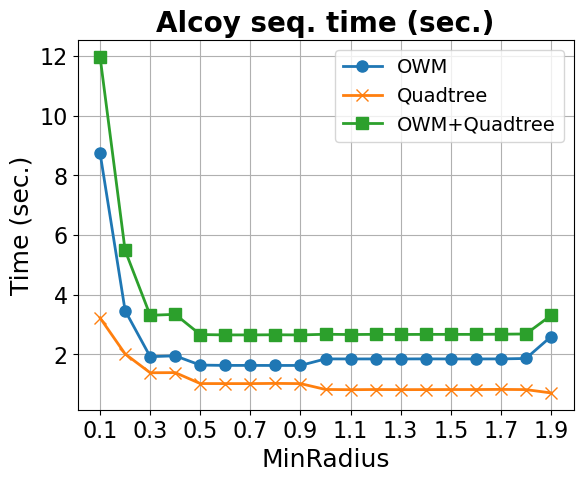

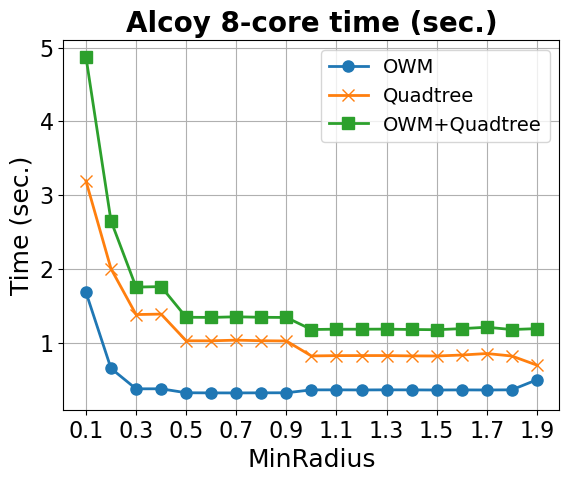

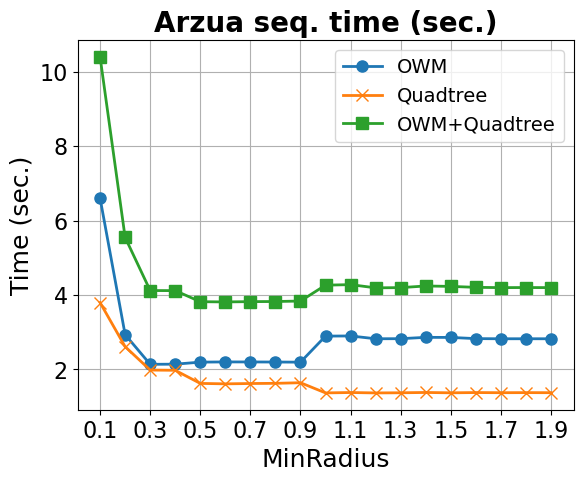

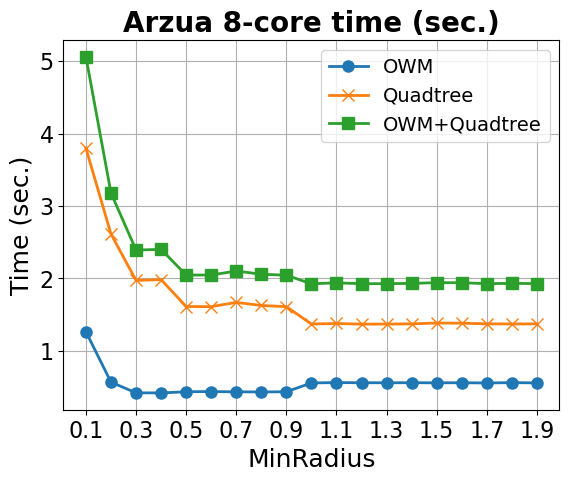

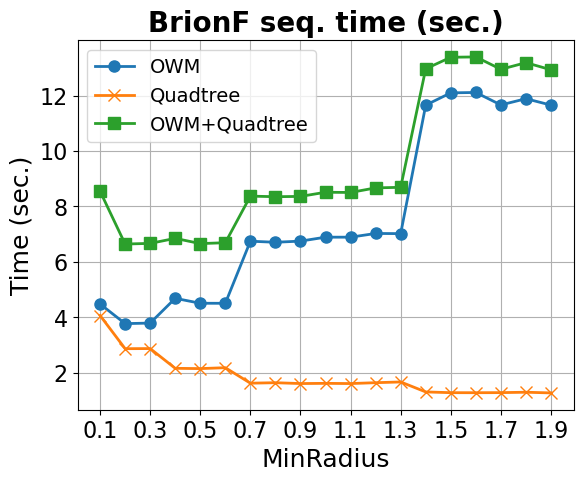

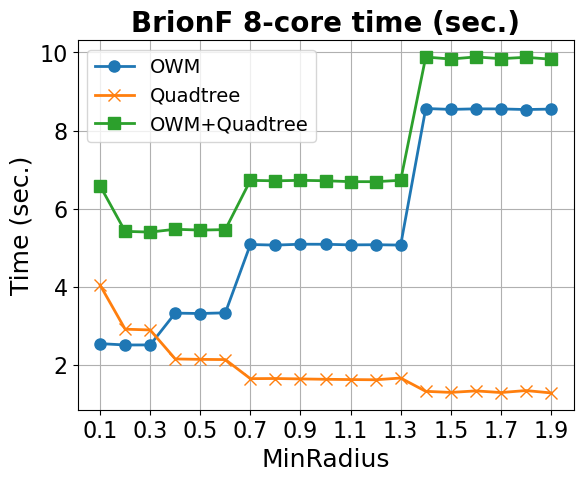

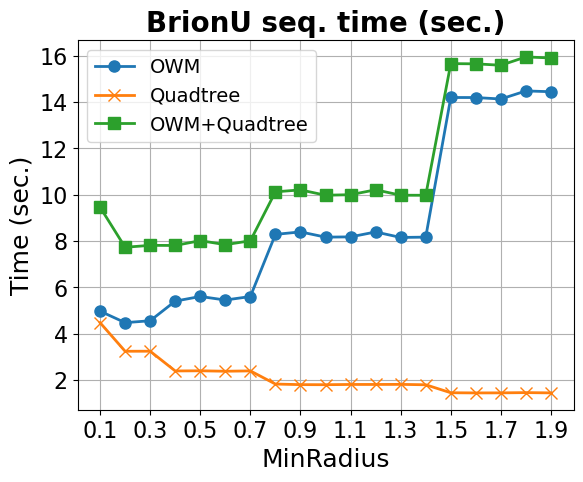

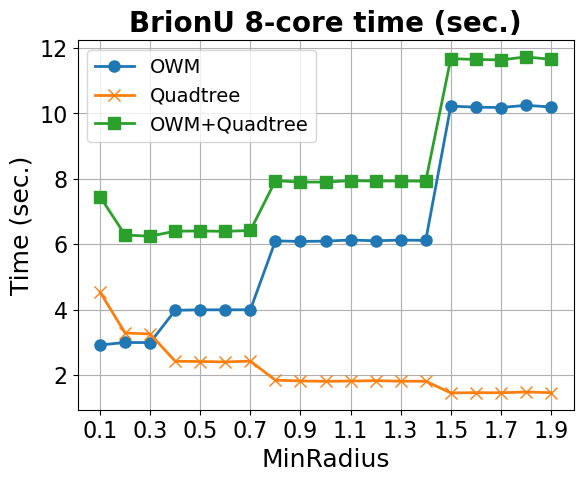

In [6]:
import matplotlib.pyplot as plt
def plot_cloudtime(cloudname,nth,results):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']

    x=list(results[cloudname].keys())
    fig = plt.figure()
    plt.plot(np.array(x), np.array([results[cloudname][i][nth]['owm'] for i in x]), marks[0], linewidth=linew, markersize=markers)
    plt.plot(np.array(x), np.array([results[cloudname][i][nth]['qtree'] for i in x]), marks[1], linewidth=linew, markersize=markers)
    plt.plot(np.array(x), np.array([results[cloudname][i][nth]['qtree']+results[cloudname][i][nth]['owm'] for i in x]), marks[2], linewidth=linew, markersize=markers)

    labels=['OWM','Quadtree','OWM+Quadtree']
    if nth==1:
        plt.title(cloudname[:-1]+' seq. time (sec.)',  fontweight='bold', fontsize=titlefs)
    else:
        plt.title(cloudname[:-1]+' 8-core time (sec.)',  fontweight='bold', fontsize=titlefs)
    plt.legend(labels,loc='best', fontsize= legendfs)
    plt.ylabel('Time (sec.)', fontsize=ylabelfs)
    plt.xlabel('MinRadius', fontsize=xlabelfs)
    plt.xticks(x[::2],fontsize=xticksfs)
    plt.yticks(fontsize=yticksfs)
    plt.grid()

    plt.show()

plot_cloudtime('AlcoyH',1,res1)
plot_cloudtime('AlcoyH',8,res1)
plot_cloudtime('ArzuaH',1,res1)
plot_cloudtime('ArzuaH',8,res1)
plot_cloudtime('BrionFH',1,res1)
plot_cloudtime('BrionFH',8,res1)
plot_cloudtime('BrionUH',1,res1)
plot_cloudtime('BrionUH',8,res1)

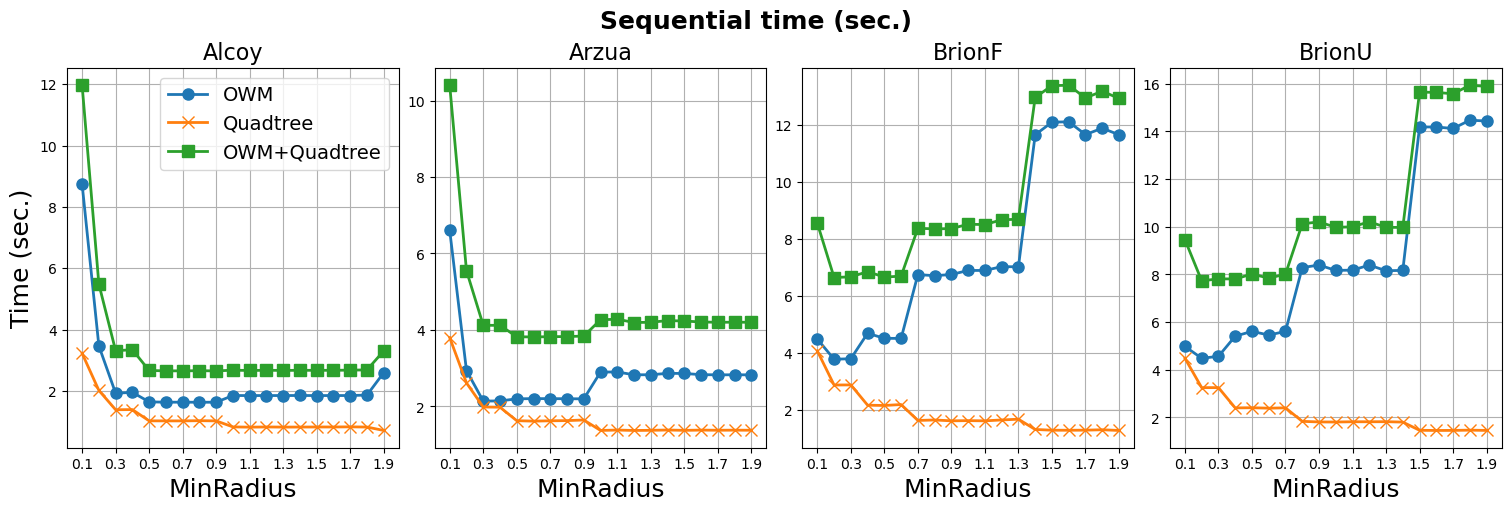

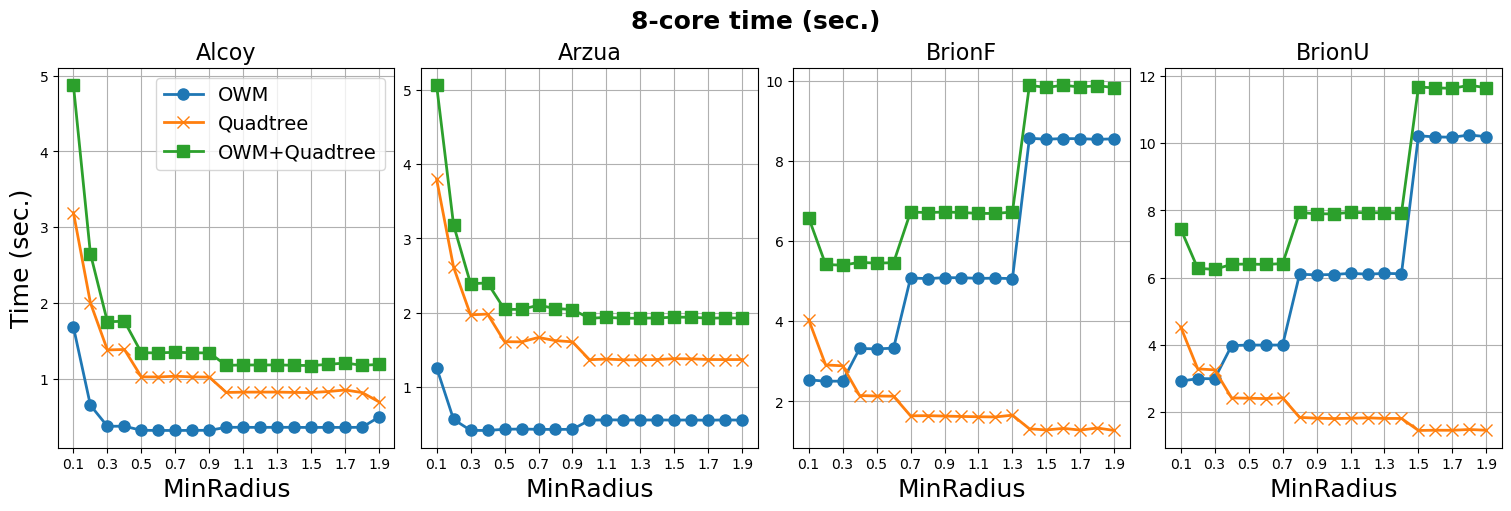

In [7]:
def plot_alltimes(nth,results):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']

    #fig = plt.figure()
    labels=['OWM','Quadtree','OWM+Quadtree']
    #define grid of plots
    fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(15, 5), constrained_layout=True) #sharey=True
    for i,name in zip(range(4),['AlcoyH','ArzuaH','BrionFH','BrionUH']):
        x=list(results[name].keys())
        axs[i].plot(np.array(x), np.array([results[name][i][nth]['owm'] for i in x]), marks[0], linewidth=linew, markersize=markers)
        axs[i].plot(np.array(x), np.array([results[name][i][nth]['qtree'] for i in x]), marks[1], linewidth=linew, markersize=markers)
        axs[i].plot(np.array(x), np.array([results[name][i][nth]['qtree']+results[name][i][nth]['owm'] for i in x]), marks[2], linewidth=linew, markersize=markers)

        axs[i].set_title(name[:-1],fontsize=16)
        axs[i].set_xlabel('MinRadius', fontsize=xlabelfs)
        axs[i].set_xticks(x[::2],fontsize=xticksfs)
        # axs[i].yticks(fontsize=yticksfs)
        axs[i].grid()

    if nth==1:
        fig.suptitle('Sequential time (sec.)',  fontweight='bold', fontsize=18)
    else:
        fig.suptitle('8-core time (sec.)',  fontweight='bold', fontsize=18)
    axs[0].set_ylabel('Time (sec.)', fontsize=ylabelfs)
    axs[0].legend(labels,loc='best', fontsize= 14)
    #axs[i].show()

plot_alltimes(1,res1)
plot_alltimes(8,res1)


In [49]:

pp = PdfPages("Speedup-qmin.pdf")
pp.savefig(fig)
pp.close()

# Now processes the o2and3 results of the minRadius study WITH memoization first approach

1. Compile o2and3 using stage1tbbrem (with memoization first approach):
```
make bin/o2and3
```
2. Run the benchmarking script
```
cd scripts
python3 run_o2and3_minradius
```
3. The output that we will process is o2and3_minrad_coffee.txt (renamed from o2and3.out)



In [8]:
res2=tokenize("o2and3_minrad_coffee.txt")

#print(results)

for i in res2:
    times=[res2[i][j][1]['owm'] for j in res2[i]]
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with baseline minRadius {:.1f} has sequential OWM time = {:.2f}".format(i,list(res2[i].keys())[0],res2[i][0.1][1]['owm'] ))
    print("Cloud {} with best minRadius {:.1f} has sequential OWM best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res2[i].keys())[minRad],mintime ,res2[i][0.1][1]['owm']/mintime))


Cloud Alcoy with baseline minRadius 0.1 has sequential OWM time = 6.17
Cloud Alcoy with best minRadius 0.9 has sequential OWM best time (speedup) = 1.29 (4.79x)
Cloud Arzua with baseline minRadius 0.1 has sequential OWM time = 4.03
Cloud Arzua with best minRadius 0.3 has sequential OWM best time (speedup) = 1.49 (2.71x)
Cloud BrionF with baseline minRadius 0.1 has sequential OWM time = 2.22
Cloud BrionF with best minRadius 0.3 has sequential OWM best time (speedup) = 1.88 (1.18x)
Cloud BrionU with baseline minRadius 0.1 has sequential OWM time = 2.39
Cloud BrionU with best minRadius 0.3 has sequential OWM best time (speedup) = 2.18 (1.10x)


In [9]:
for i in res2:
    times=[res2[i][j][8]['owm'] for j in res2[i]]
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with baseline minRadius {:.1f} has 8-core OWM time = {:.2f}".format(i,list(res2[i].keys())[0],res2[i][0.1][8]['owm'] ))
    print("Cloud {} with best minRadius {:.1f} has 8-core OWM best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res2[i].keys())[minRad],mintime ,res2[i][0.1][8]['owm']/mintime))


Cloud Alcoy with baseline minRadius 0.1 has 8-core OWM time = 1.22
Cloud Alcoy with best minRadius 0.9 has 8-core OWM best time (speedup) = 0.26 (4.73x)
Cloud Arzua with baseline minRadius 0.1 has 8-core OWM time = 0.82
Cloud Arzua with best minRadius 0.3 has 8-core OWM best time (speedup) = 0.30 (2.72x)
Cloud BrionF with baseline minRadius 0.1 has 8-core OWM time = 1.36
Cloud BrionF with best minRadius 0.2 has 8-core OWM best time (speedup) = 1.34 (1.02x)
Cloud BrionU with baseline minRadius 0.1 has 8-core OWM time = 1.55
Cloud BrionU with best minRadius 0.1 has 8-core OWM best time (speedup) = 1.55 (1.00x)


In [10]:

for i in res2:
    times=[res2[i][j][1]['qtree'] for j in res2[i]]
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with minRadius {:.1f} has qtree creation best time = {:.2f}".format(i,list(res2[i].keys())[minRad],mintime ))


Cloud Alcoy with minRadius 1.9 has qtree creation best time = 0.70
Cloud Arzua with minRadius 1.5 has qtree creation best time = 1.37
Cloud BrionF with minRadius 1.5 has qtree creation best time = 1.28
Cloud BrionU with minRadius 1.9 has qtree creation best time = 1.45


In [11]:

for i in res2:
    times=[res2[i][j][1]['qtree']+res2[i][j][8]['owm'] for j in res2[i]] #8-core OWM + qtree times
    mintime=min(times)
    minRad=np.argmin(times)
    baselinetotaltime=res2[i][0.1][1]['qtree']+res2[i][0.1][8]['owm']
    print("Cloud {} with baseline minRadius {:.1f} has total (8-core owm + qtree creation) time = {:.2f}".format(i,list(res2[i].keys())[0],baselinetotaltime ))
    print("Cloud {} with best minRadius {:.1f} has total (8-core owm + qtree creation) best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res2[i].keys())[minRad],mintime ,baselinetotaltime/mintime))


Cloud Alcoy with baseline minRadius 0.1 has total (8-core owm + qtree creation) time = 4.41
Cloud Alcoy with best minRadius 1.9 has total (8-core owm + qtree creation) best time (speedup) = 1.10 (4.02x)
Cloud Arzua with baseline minRadius 0.1 has total (8-core owm + qtree creation) time = 4.63
Cloud Arzua with best minRadius 1.5 has total (8-core owm + qtree creation) best time (speedup) = 1.78 (2.61x)
Cloud BrionF with baseline minRadius 0.1 has total (8-core owm + qtree creation) time = 5.49
Cloud BrionF with best minRadius 0.4 has total (8-core owm + qtree creation) best time (speedup) = 3.89 (1.41x)
Cloud BrionU with baseline minRadius 0.1 has total (8-core owm + qtree creation) time = 6.02
Cloud BrionU with best minRadius 0.4 has total (8-core owm + qtree creation) best time (speedup) = 4.50 (1.34x)


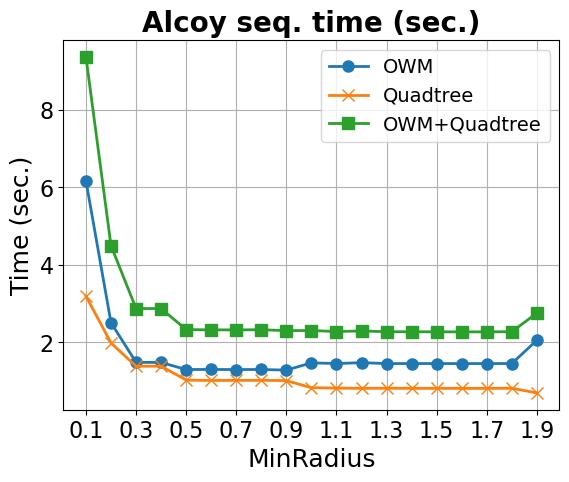

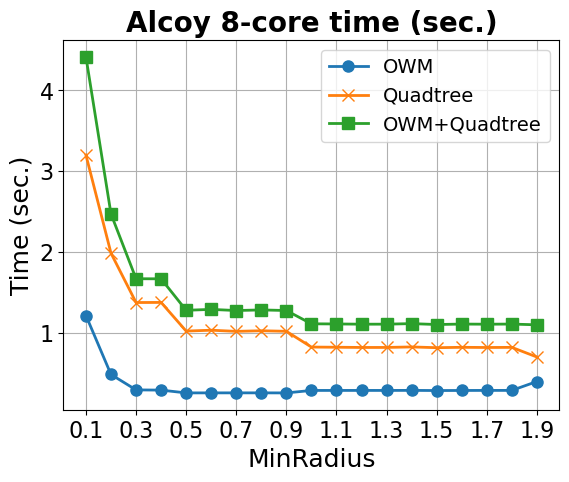

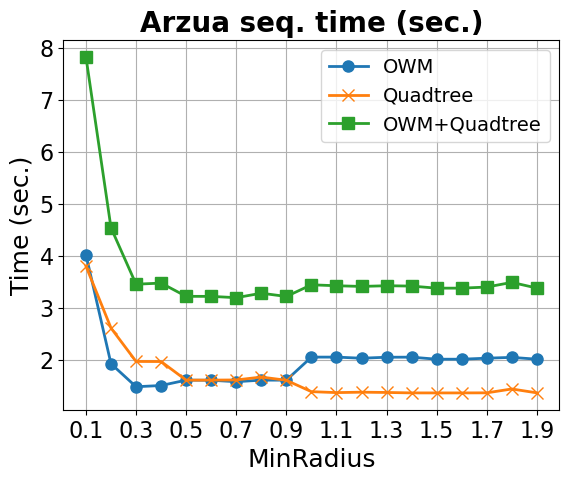

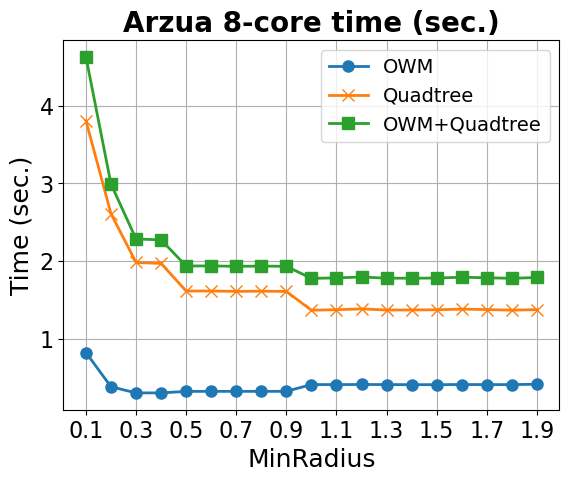

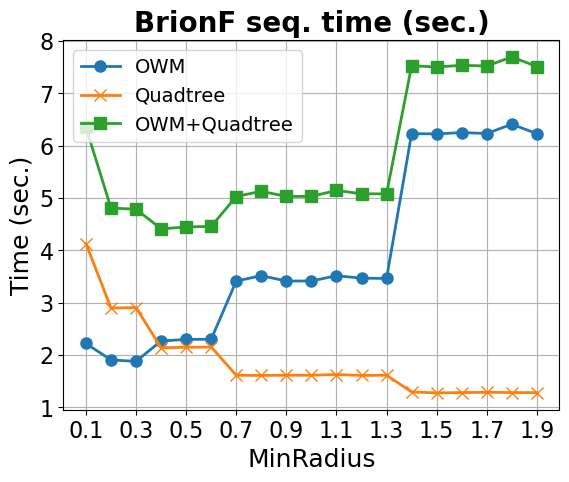

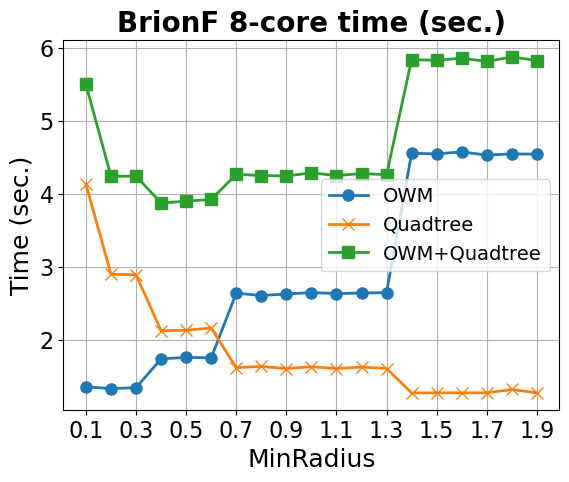

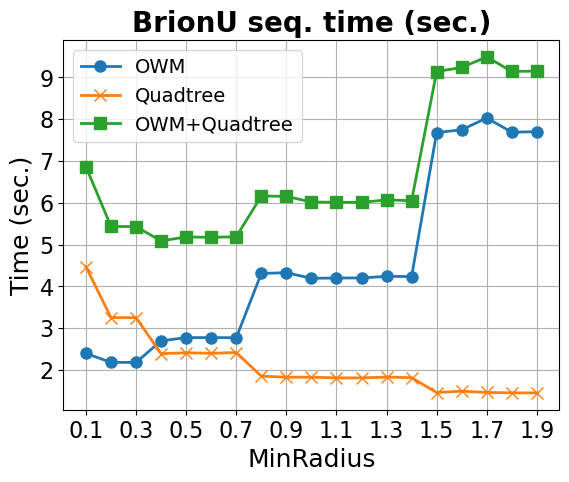

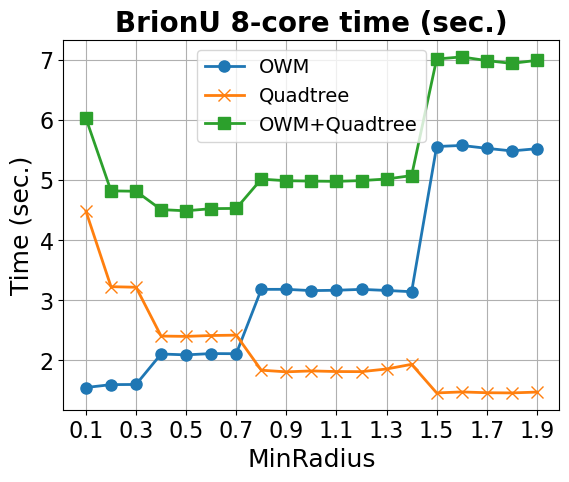

In [13]:

# Execution time for each cloud with tfm/parallelcpp version depending on minRadius
import matplotlib.pyplot as plt
def plot_cloudtime(cloudname,nth,results):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']

    x=list(results[cloudname].keys())
    fig = plt.figure()
    plt.plot(np.array(x), np.array([results[cloudname][i][nth]['owm'] for i in x]), marks[0], linewidth=linew, markersize=markers)
    plt.plot(np.array(x), np.array([results[cloudname][i][nth]['qtree'] for i in x]), marks[1], linewidth=linew, markersize=markers)
    plt.plot(np.array(x), np.array([results[cloudname][i][nth]['qtree']+results[cloudname][i][nth]['owm'] for i in x]), marks[2], linewidth=linew, markersize=markers)

    labels=['OWM','Quadtree','OWM+Quadtree']
    if nth==1:
        plt.title(cloudname+' seq. time (sec.)',  fontweight='bold', fontsize=titlefs)
    else:
        plt.title(cloudname+' 8-core time (sec.)',  fontweight='bold', fontsize=titlefs)
    plt.legend(labels,loc='best', fontsize= legendfs)
    plt.ylabel('Time (sec.)', fontsize=ylabelfs)
    plt.xlabel('MinRadius', fontsize=xlabelfs)
    plt.xticks(x[::2],fontsize=xticksfs)
    plt.yticks(fontsize=yticksfs)
    plt.grid()

    plt.show()

plot_cloudtime('Alcoy',1,res2)
plot_cloudtime('Alcoy',8,res2)
plot_cloudtime('Arzua',1,res2)
plot_cloudtime('Arzua',8,res2)
plot_cloudtime('BrionF',1,res2)
plot_cloudtime('BrionF',8,res2)
plot_cloudtime('BrionU',1,res2)
plot_cloudtime('BrionU',8,res2)


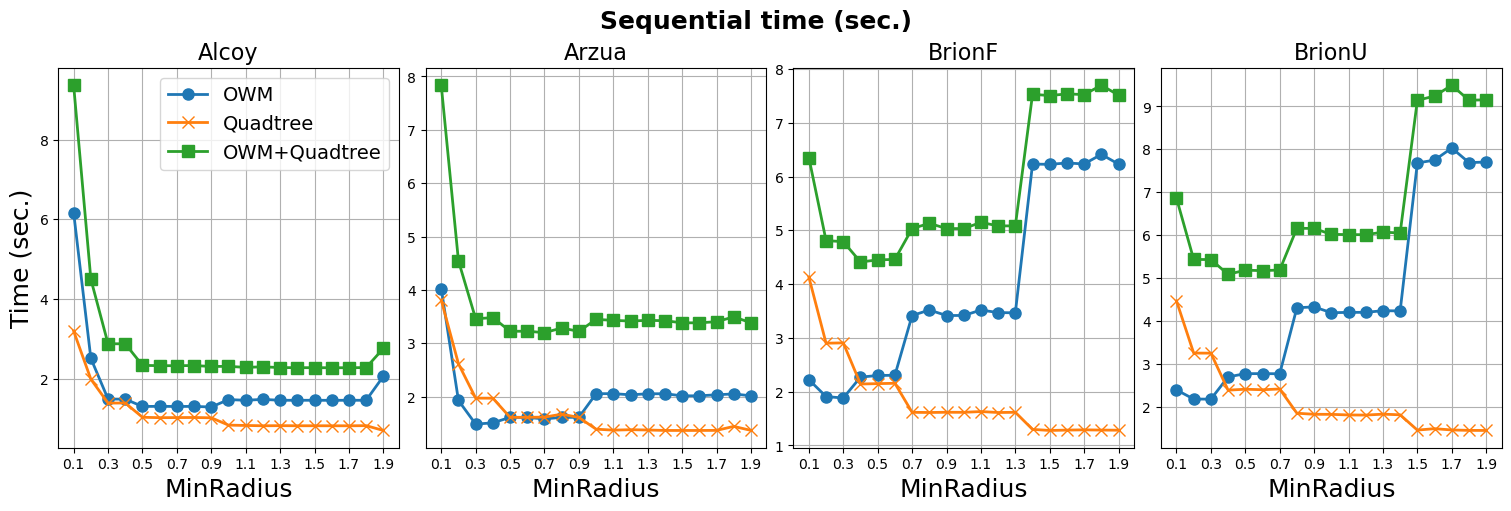

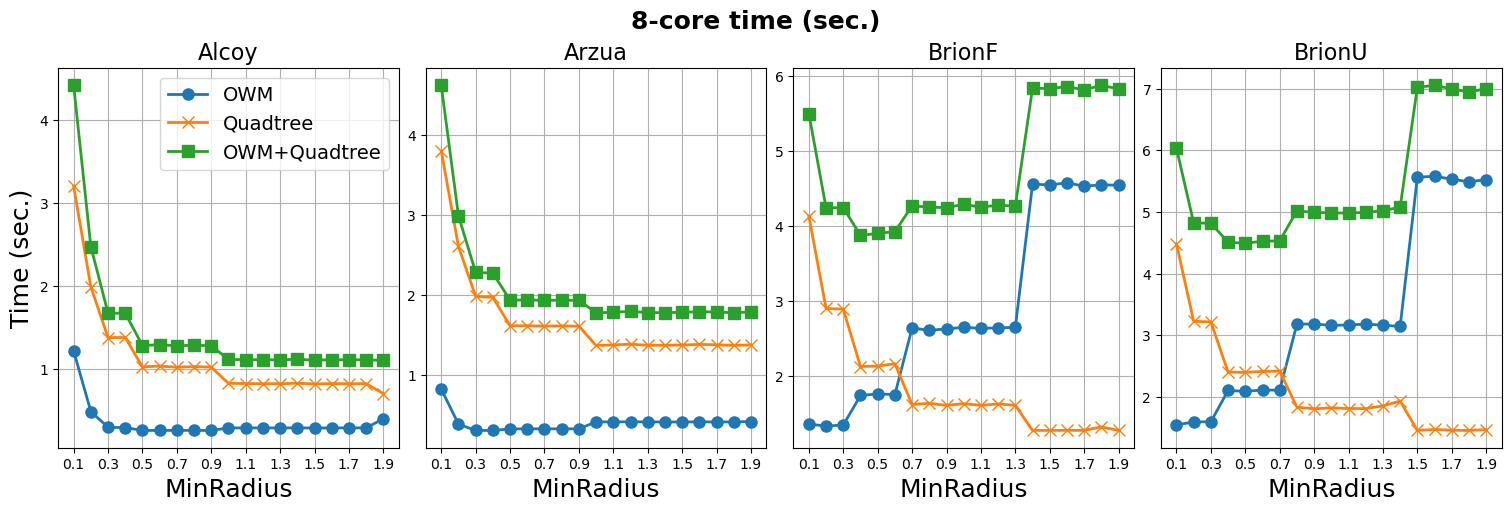

In [14]:

def plot_alltimes(nth,results):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']

    #fig = plt.figure()
    labels=['OWM','Quadtree','OWM+Quadtree']
    #define grid of plots
    fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(15, 5), constrained_layout=True) #sharey=True
    for i,name in zip(range(4),['Alcoy','Arzua','BrionF','BrionU']):
        x=list(results[name].keys())
        axs[i].plot(np.array(x), np.array([results[name][i][nth]['owm'] for i in x]), marks[0], linewidth=linew, markersize=markers)
        axs[i].plot(np.array(x), np.array([results[name][i][nth]['qtree'] for i in x]), marks[1], linewidth=linew, markersize=markers)
        axs[i].plot(np.array(x), np.array([results[name][i][nth]['qtree']+results[name][i][nth]['owm'] for i in x]), marks[2], linewidth=linew, markersize=markers)

        axs[i].set_title(name,fontsize=16)
        axs[i].set_xlabel('MinRadius', fontsize=xlabelfs)
        axs[i].set_xticks(x[::2],fontsize=xticksfs)
        # axs[i].yticks(fontsize=yticksfs)
        axs[i].grid()

    if nth==1:
        fig.suptitle('Sequential time (sec.)',  fontweight='bold', fontsize=18)
    else:
        fig.suptitle('8-core time (sec.)',  fontweight='bold', fontsize=18)
    axs[0].set_ylabel('Time (sec.)', fontsize=ylabelfs)
    axs[0].legend(labels,loc='best', fontsize= 14)
    #axs[i].show()

plot_alltimes(1,res2)
plot_alltimes(8,res2)
